<a href="https://colab.research.google.com/github/GabrielVillagran/KNN-python/blob/main/Knearest_VillagranSaucedoGabriel.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Homework: PNN Classification**

Villagran Saucedo Gabriel Aldair

Undergraduate, 2017 generation, 267572, 201702370947

Dr. Cuevas Tello Juan Carlos

Aprendizaje Automatico (Machine Learning)

04/04/2022

**Introduction**

I am going to use the KNN classifier that is implemented on scikitlearn library, in this notebookyou will find the KNN classifier using the wine dataset splitted into (20% 80%) and (50% 50%).

At the end of the notebook I decided to calculate the best number of neighbors that the classifier can use and also I calculated the best percentage to split the data.
So using the best number of neighbor and the best percentage for splitting that were calculated before we can get a better result using a KNN classifier.

**Wine dataset**

In [1]:
#Wine
import pandas as pd
import numpy as np
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt

#Importing and printing the datasets
wine = datasets.load_wine()
#Giving the format as a dataframe with pandas
df = pd.DataFrame(wine["data"], columns = wine["feature_names"])
df["target"] = wine["target"]
#df.head()
X = df
#removing the target on the column
y= X.pop("target")
X.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0


In [2]:
#printing the shape of the dataset
X.shape

(178, 13)

**Splitting the data into 20% and calculating the accuracy using the KNN classifier**

In [3]:
#splitting the data into 80 training and 20 testing
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state=55)
print("Rows that will be used for training:", X_train.shape)
print("Rows that will be used for testing:",X_test.shape)


Rows that will be used for training: (142, 13)
Rows that will be used for testing: (36, 13)


In [8]:
#Trining the classifier
#Creating the classifiers (KNN)
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)
#Here I will check the accuracy of the model
knn.score(X_test, y_test)

0.8333333333333334

**Splitting the data into 80% and calculating the accuracy using the KNN classifier**

In [14]:
#splitting the data into 80 training and 20 testing
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.8, random_state=55)
print("Rows that will be used for training:", X_train.shape)
print("Rows that will be used for testing:",X_test.shape)

Rows that will be used for training: (35, 13)
Rows that will be used for testing: (143, 13)


In [15]:
#Trining the classifier
#Creating the classifiers (KNN)
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)
#Here I will check the accuracy of the model
knn.score(X_test, y_test)

0.6643356643356644

**Tunning the model sensivity of n_neighbors to get the best accuracy**

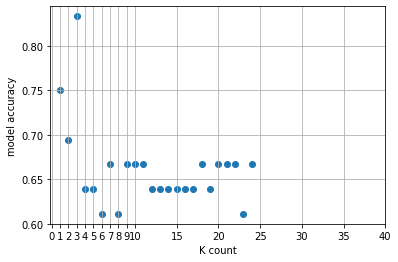

In [7]:
k_range = range (1,25)
scores = []
for k in k_range:
  knn = KNeighborsClassifier(n_neighbors=k)
  knn.fit(X_train, y_train)
  scores.append(knn.score(X_test, y_test))


plt.figure()
plt.xlabel("K count")
plt.ylabel("model accuracy")
plt.scatter(k_range, scores)
plt.grid()
plt.xticks([0,1,2,3,4,5,6,7,8,9,10,15,20,25,30,35,40])
plt.show()

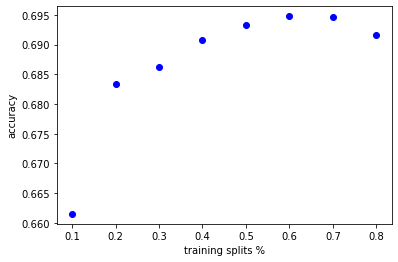

In [13]:
#Claculating the best test percentage for the classifier
test_sizes=[0.8, 0.7, 0.6, 0.5, 0.4, 0.3, 0.2, 0.1]
knn = KNeighborsClassifier(n_neighbors=5)

plt.figure()

for test_size in test_sizes:
  scores=[]

  for i in range(1,1000):
    X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 1 - test_size)
    knn.fit(X_train, y_train)
    scores.append(knn.score(X_test, y_test))
  plt.plot(test_size, np.mean(scores), "bo")

plt.xlabel("training splits %")
plt.ylabel("accuracy")
plt.show()

**Iris Dataset**

In [19]:
#Importing and printing the datasets
iris = datasets.load_iris()
#Giving the format as a dataframe with pandas
df = pd.DataFrame(iris["data"], columns = iris["feature_names"])
df["target"] = iris["target"]
#df.head()
X = df
#removing the target on the column
y= X.pop("target")
X.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [20]:
#printing the shape of the dataset
X.shape

(150, 4)

**Splitting the data into 20% and calculating the accuracy using the KNN classifier**

In [21]:
#splitting the data into 80 training and 20 testing
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state=55)
print("Rows that will be used for training:", X_train.shape)
print("Rows that will be used for testing:",X_test.shape)

Rows that will be used for training: (120, 4)
Rows that will be used for testing: (30, 4)


In [23]:
#Training the classifier
#Creating the classifiers (KNN)
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)
#Here I will check the accuracy of the model
knn.score(X_test, y_test)

0.9666666666666667

**Splitting the data into 50% and calculating the accuracy using the KNN classifier**

In [24]:
#splitting the data into 80 training and 20 testing
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.5, random_state=55)
print("Rows that will be used for training:", X_train.shape)
print("Rows that will be used for testing:",X_test.shape)

Rows that will be used for training: (75, 4)
Rows that will be used for testing: (75, 4)


In [25]:
#Training the classifier
#Creating the classifiers (KNN)
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)
#Here I will check the accuracy of the model
knn.score(X_test, y_test)

0.9866666666666667

**Conclusion**

There are many classifiers that can be used but if we have to choose the best ones, that will depend on the data that were going to use and what we have to calculate, for instance, we have different accuracy percent if we use a SVM Linear against a KNN.

Lokking at the table below and comparing all the classifiers that I used, the best accuracy percentage was the SVM RBF (this was calculated using weka) \

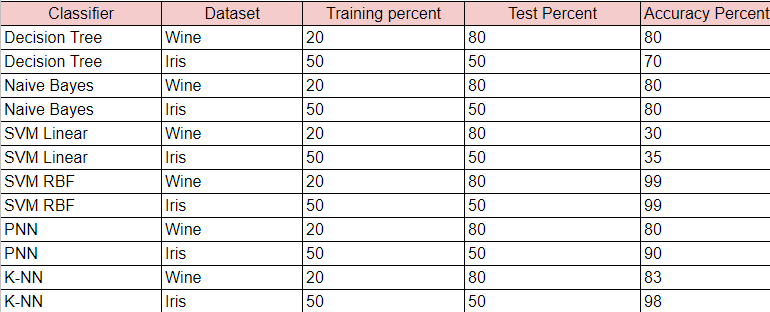